In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
from didiUtil import DIDI201705, DIDI201706, DIDI201707, DIDI201708, DIDI201709, DIDI201710
from predictor import LSTMPredictor

Using TensorFlow backend.


## DIDI

## LSTMPredictor

In [7]:
lstm_predictor = LSTMPredictor()
lstm_predictor.train_month = DIDI201705

### 训练模型

In [7]:
train_x, train_y = lstm_predictor.get_train_vec(DIDI201705)
test_x, test_y = lstm_predictor.get_train_vec(DIDI201706)
lstm_predictor.train_model(train_x, train_y)
predict_y = lstm_predictor.model.predict(test_x)

./didi05.csv.lstm.h5


In [8]:
len(predict_y), len(test_y)

(707, 707)

### 使用seaborn画图需要将数据合成df

In [9]:
date_index = pd.date_range(start='2017-06-01 13:00:00', periods=707, freq='H')
merge_data = {
    'predict': predict_y.flatten(),
    'real': test_y.flatten()
}
lstm_df = pd.DataFrame(merge_data, index=date_index)

# 实验结果

In [10]:
sns.set(style="whitegrid")
sns.set_context(rc={"lines.linewidth": 2})

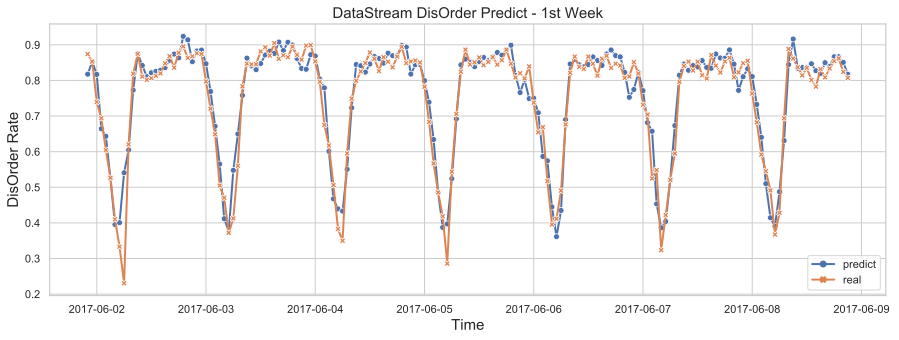

In [11]:
# plt.figure(figsize=(15, 5))
f, ax = plt.subplots(figsize = (15, 5))
# 设置图名称
ax.set_title('DataStream DisOrder Predict - 1st Week', fontsize=15)
# 设置X轴 Y轴 的label
ax.set_xlabel('Time',fontsize=15)
ax.set_ylabel('DisOrder Rate',fontsize=15)
sns.lineplot(size='event',
             markers=True,dashes=False,
             data=lstm_df[9:177])

## 封装成一个画图类

In [8]:
from didiDraw import DrawLSTM
draw = DrawLSTM()
draw.set_train_month(DIDI201705)
test_y, predict_y = draw.get_predict_result(DIDI201705, DIDI201706)

./didi05.csv.lstm.h5


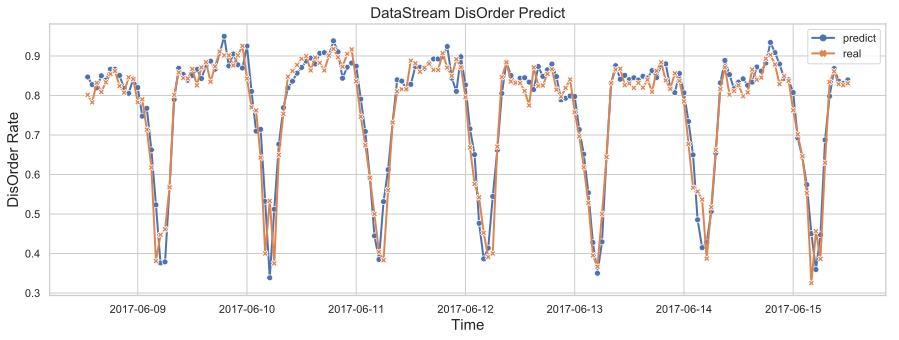

In [10]:
draw.draw_real_predict(
    week_num=2,
    start_time="2017-06-01 13:00:00",
    title="DataStream DisOrder Predict",
    figsize=(15,5)
)

## 回归性能指标

### 均方根误差(Root Mean Squard Error，RMSE)

$RMSE=\sqrt{\frac{1}{m} \sum_{i=1}^{m}\left(f_{i}-y_{i}\right)^{2}}$

### 平均绝对误差(Mean Absolute Error，MAE)

$MAE=\frac{1}{m} \sum_{i=1}^{m}\left|f_{i}-y_{i}\right|$

### R-squared
$R^{2}=1-\frac{\sum_{i=1}^{m}\left(f_{i}-y_{i}\right)^{2}}{\sum_{i=1}^{m}\left(\overline{y_{i}}-y_{i}\right)^{2}}$

In [5]:
from didiMetric import get_reg_metrics

In [6]:
months = [DIDI201705, DIDI201706, DIDI201707, DIDI201708, DIDI201709, DIDI201710]

### 使用更新的模型

In [ ]:
update_metrics = get_reg_metrics(months, True)

### 不使用更新的模型

In [8]:
unupdate_metrics = get_reg_metrics(months, False)

./didi05.csv.lstm.h5
./didi05.csv.lstm.h5
./didi05.csv.lstm.h5
./didi05.csv.lstm.h5
./didi05.csv.lstm.h5


In [9]:
result = pd.concat([update_metrics,unupdate_metrics], axis=1)

In [10]:
result.columns = [["Update Model","Update Model","Update Model","UnUpdate","UnUpdate","UnUpdate"],["RMSE", "MAE", "R2S","RMSE", "MAE", "R2S"]]

In [11]:
result

Update Model                      UnUpdate                    
                   RMSE       MAE       R2S      RMSE       MAE       R2S
2017-06-01     0.047213  0.025274  0.913229  0.047213  0.025274  0.913229
2017-07-01     0.040778  0.022407  0.934089  0.043063  0.026041  0.926497
2017-08-01     0.040197  0.022231  0.935630  0.041211  0.020616  0.932340
2017-09-01     0.048727  0.025717  0.900785  0.045622  0.023412  0.913027
2017-10-01     0.047088  0.024284  0.897453  0.047925  0.025802  0.893774